# Aula Assincrona 02 - Machine Learning

RA: 23022369 - Bruno Caboclo Dos Santos Ribeiro<br>

### Importando bibliotecas

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Importando dataset

In [8]:
# Carregar o conjunto de dados proposto no canvas(Arquivo FuelConsumptionCo2.csv)
print('\033[33m\nImportando arquivo...\033[m')
dataFrame = pd.read_csv("FuelConsumptionCo2.csv")

print('\033[33mExibindo DataFrame...\033[m')
dataFrame


Importando arquivo...
Exibindo DataFrame...


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Matriz de Correlação entre as variáveis


Adaptando variaveis strings para numericas...
Plotando Matriz de correlação...


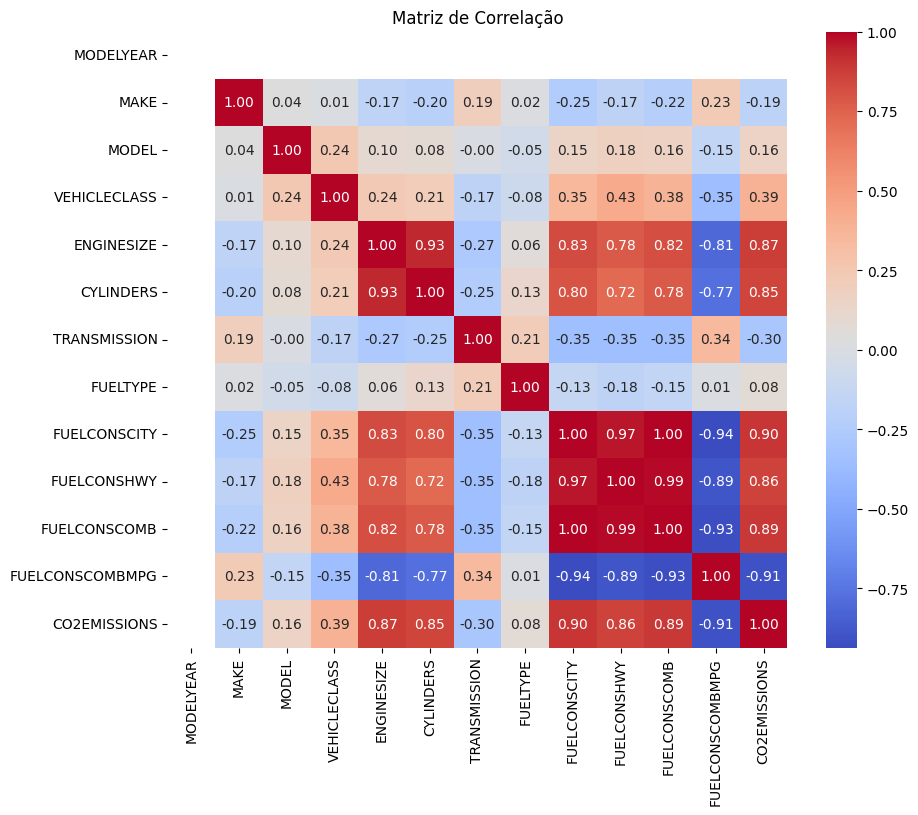

In [27]:
# Garante que vamos ter uma copia dos dados originais
copyDataFrame = dataFrame.copy() 

print('\033[33m\nAdaptando variaveis strings para numericas...\033[m')
# Transformar todas as colunas que tem dados como string para números, onde é possivel gerar uma correlação delas
dataFrame['MAKE'] = dataFrame['MAKE'].astype('category').cat.codes
dataFrame['MODEL'] = dataFrame['MODEL'].astype('category').cat.codes
dataFrame['VEHICLECLASS'] = dataFrame['VEHICLECLASS'].astype('category').cat.codes
dataFrame['TRANSMISSION'] = dataFrame['TRANSMISSION'].astype('category').cat.codes
dataFrame['FUELTYPE'] = dataFrame['FUELTYPE'].astype('category').cat.codes

# Calcular a matriz de correlação
correlation = dataFrame.corr()

# Ajustar configurações de exibição para que a matrix não apareça de forma truncada
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exibir a matriz de correlação
print('\033[33mPlotando Matriz de correlação...\033[m')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# É possivel observar que devido não existir uma
# variação nos dados para da coluna MODELYEAR não
# foi possivel calcular a correlação em relação 
# a outras variáveis numéricas


### Atualização dos seguintes campos

FUELCONSUMPTION_CITY = FUELCONSCITY<br>
FUELCONSUMPTION_HWY = FUELCONSHWY<br>
FUELCONSUMPTION_COMB = FUELCONSCOMB<br>
FUELCONSUMPTION_COMB_MPG = FUELCONSCOMBMPG<br>

In [28]:
print('\033[33mAtualizando nome das colunas do dataset...\033[m')
# Atualizandos todos as colunas solicitadas
dataFrame = dataFrame.rename(columns={
    'FUELCONSUMPTION_CITY': 'FUELCONSCITY',
    'FUELCONSUMPTION_HWY': 'FUELCONSHWY',
    'FUELCONSUMPTION_COMB': 'FUELCONSCOMB',
    'FUELCONSUMPTION_COMB_MPG': 'FUELCONSCOMBMPG'
})

# Ajustar configurações de exibição para qa tabela não apareça inteira
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

print('\033[33mExibindo "novo" DataFrame...\033[m')
dataFrame

Atualizando nome das colunas do dataset...
Exibindo "novo" DataFrame...


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,...,FUELCONSCITY,FUELCONSHWY,FUELCONSCOMB,FUELCONSCOMBMPG,CO2EMISSIONS
0,2014,0,329,0,2.0,...,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,...,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,...,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,...,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,...,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,38,624,11,3.0,...,13.4,9.8,11.8,24,271
1063,2014,38,624,11,3.2,...,13.2,9.5,11.5,25,264
1064,2014,38,625,11,3.0,...,13.4,9.8,11.8,24,271
1065,2014,38,625,11,3.2,...,12.9,9.3,11.3,25,260


### Crie um novo dataframe com as seguintes colunas: 
'ENGINESIZE','CYLINDERS','FUELCONSCOMB','CO2EMISSIONS'

In [29]:
print('\033[33mCriando novo dataSet com as colunas solicitadas...\033[m')
# Criando um novo DataFrame utilizando as colunas solicitadas
modifiedDataFrame = dataFrame.loc[:, ['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB', 'CO2EMISSIONS']]

print('\033[33mExibindo DataFrame modificado...\033[m')
modifiedDataFrame

Criando novo dataSet com as colunas solicitadas...
Exibindo DataFrame modificado...


,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


### Faça as seguintes análises

- Separe os dados de treino e teste 
- Import sklearn library
- Crie a variável com o modelo de Regressão Linear 
- Separe os dados de treino e teste 
- Separe as Features de Treino e Teste 
- Rode o Modelo 
- Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente 
- Plot o Gráfico de Regressão Linear com a Reta Ajuste 
- Encontre o R2-Score


Criando novo dataSet com as colunas solicitadas...
Separando os dados de teste...
Criando o modelo de regressão linear...
Treinando o modelo com os dados de treino...
Obtendo coeficientes...
Prevendo valores de CO2EMISSIONS...
Calculado R2-Score...
Plotando Gráfico de Regressão Linear...


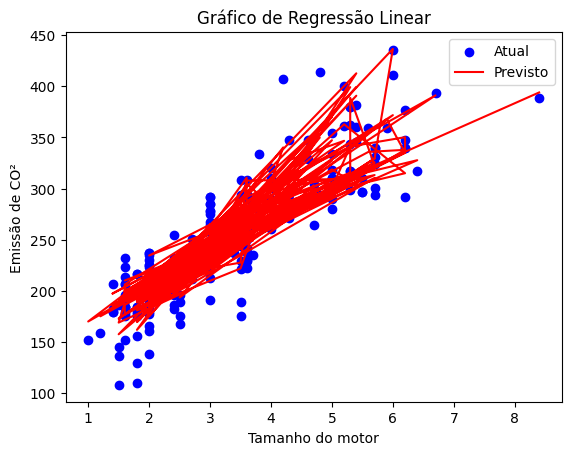

R2-Score: 0.875970520691407


In [40]:
# Criar o novo DataFrame com as colunas solicitadas no exercicio
print('\033[33m\nCriando novo dataSet com as colunas solicitadas...\033[m')
modifiedDataFrameExerciseFour = dataFrame[['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB', 'CO2EMISSIONS']]

# Com o novo dataSet já criado, separar os dados de treino e teste
print('\033[33mSeparando os dados de teste...\033[m')
X = modifiedDataFrameExerciseFour[['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB']]
# Variavel escolhida para a analise foi CO2EMISSIONS para entender como as caracteristicas do veiculo
# podem influenciar as emissões de CO2.
y = modifiedDataFrameExerciseFour['CO2EMISSIONS'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear
print('\033[33mCriando o modelo de regressão linear...\033[m')
model = LinearRegression()

# Treinando o modelo com os dados de treino
print('\033[33mTreinando o modelo com os dados de treino...\033[m')
model.fit(X_train, y_train)

print('\033[33mObtendo coeficientes...\033[m')
# Obter os coeficientes Theta 0 e Theta 1
theta0 = model.intercept_ # Valor esperado de Y
theta1 = model.coef_ # Mudança esperada em Y para uma unidade de mudança em X

# Prever os valores de CO2EMISSIONS para os dados de teste
print('\033[33mPrevendo valores de CO2EMISSIONS...\033[m')
yPredict = model.predict(X_test)

# Calcular o R2-Score
print('\033[33mCalculado R2-Score...\033[m')
r2 = r2_score(y_test, yPredict)

# Plotar o gráfico de regressão linear
print('\033[33mPlotando Gráfico de Regressão Linear...\033[m')
plt.scatter(X_test['ENGINESIZE'], y_test, color='blue', label='Atual')
plt.plot(X_test['ENGINESIZE'], yPredict, color='red', label='Previsto')
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão de CO²')
plt.title('Gráfico de Regressão Linear')
plt.legend()
plt.show()

# Exibir o R2-Score
print('R2-Score:', r2)

### Encontre o Melhor ajuste (R2-Score) entre as combinações de variáveis abaixo

- FUELCONSCOMB & CO2EMISSIONS
- CYLINDERS & CO2EMISSIONS
- ENGINESIZE & CO2EMISSIONS

In [44]:
# Criado uma função para realizar a regressão linear 
# Para todas as combinações solicitadas nos exercicios
def calculateR2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criando modelo de regressão linear
    model = LinearRegression()
    
    # Treinando do modelo
    model.fit(X_train, y_train)
    
    # Predição dos valores
    yPredict = model.predict(X_test)
    
    # Cálculo do R2-Score
    r2 = r2_score(y_test, yPredict)   
    return r2

# Combinação 1: 5.1. FUELCONSCOMB & CO2EMISSIONS
X_combinationONE = dataFrame[['FUELCONSCOMB']]
y_combinationONE = dataFrame['CO2EMISSIONS']

# Combinação 2: 5.2. CYLINDERS & CO2EMISSIONS
X_combinationTWO = dataFrame[['CYLINDERS']]
y_combinationTWO = dataFrame['CO2EMISSIONS']

# Combinação 3: 5.3. ENGINESIZE & CO2EMISSIONS
X_combinationTHREE = dataFrame[['ENGINESIZE']]
y_combinationTHREE = dataFrame['CO2EMISSIONS']

# Calcula o R2-Score para cada combinação de variáveis utilizando a função criada
r2_combinationONE = calculateR2(X_combinationONE, y_combinationONE)
r2_combinationTWO = calculateR2(X_combinationTWO, y_combinationTWO)
r2_combinationTHREE = calculateR2(X_combinationTHREE, y_combinationTHREE)

# Exibe os valores de R2-Score
print("5.1. FUELCONSCOMB & CO2EMISSIONS:", r2_combinationONE)
print("5.2. CYLINDERS & CO2EMISSIONS", r2_combinationTWO)
print("5.3. ENGINESIZE & CO2EMISSIONS", r2_combinationTHREE)

5.1. FUELCONSCOMB & CO2EMISSIONS: 0.8071474868274242
5.2. CYLINDERS & CO2EMISSIONS 0.7317140029783895
5.3. ENGINESIZE & CO2EMISSIONS 0.7615595731934373


### Tente realizar uma Regressão Linear Múltipla. Use as três variáveis

- ENGINESIZE
- CYLINDERS
- FUELCONSCOMB

In [47]:
# Separar as variáveis preditoras (X) e a variável alvo (y)
X = dataFrame[['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB']]
y = dataFrame['CO2EMISSIONS']

# Criar um regressão linear múltipla
model = LinearRegression()

# treinamento
model.fit(X, y)

# Realizar previsões utilizando o modelo treinado
predictions = model.predict(X)